# Datacamp - Analyzing Marketing Campaigns with pandas

## Chapter 1

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('csv/marketing.csv',parse_dates=['date_canceled', 'date_served', 'date_subscribed'])

df.sort_index(axis=1, inplace=True)

df.head()

,age_group,converted,date_canceled,date_served,date_subscribed,is_retained,language_displayed,language_preferred,marketing_channel,subscribing_channel,user_id,variant
0,0-18 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000029,personalization
1,19-24 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000030,personalization
2,24-30 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000031,personalization
3,30-36 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000032,personalization
4,36-45 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000033,personalization


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age_group            10037 non-null  object        
 1   converted            10022 non-null  object        
 2   date_canceled        577 non-null    datetime64[ns]
 3   date_served          10021 non-null  datetime64[ns]
 4   date_subscribed      1856 non-null   datetime64[ns]
 5   is_retained          1856 non-null   object        
 6   language_displayed   10037 non-null  object        
 7   language_preferred   10037 non-null  object        
 8   marketing_channel    10022 non-null  object        
 9   subscribing_channel  1856 non-null   object        
 10  user_id              10037 non-null  object        
 11  variant              10037 non-null  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [16]:
df.describe(include='all', datetime_is_numeric=True)

,age_group,converted,date_canceled,date_served,date_subscribed,is_retained,language_displayed,language_preferred,marketing_channel,subscribing_channel,user_id,variant
count,10037,10022,577,10021,1856,1856,10037,10037,10022,1856,10037,10037
unique,7,2,NaN,NaN,NaN,2,4,4,5,5,7309,2
top,19-24 years,False,NaN,NaN,NaN,True,English,English,House Ads,Instagram,a100000882,control
freq,1682,8946,NaN,NaN,NaN,1279,9793,9275,4733,600,12,5091
mean,NaN,NaN,2018-03-03 18:28:04.575389952,2018-01-15 05:02:03.221235712,2018-01-14 02:04:08.275862016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2018-01-05 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2018-02-07 00:00:00,2018-01-08 00:00:00,2018-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2018-03-04 00:00:00,2018-01-15 00:00:00,2018-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2018-04-01 00:00:00,2018-01-22 00:00:00,2018-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2018-05-09 00:00:00,2018-01-31 00:00:00,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
df['channel_code'] = df['subscribing_channel'].map(channel_dict)

df.head()

,age_group,converted,date_canceled,date_served,date_subscribed,is_retained,language_displayed,language_preferred,marketing_channel,subscribing_channel,user_id,variant,channel_code
0,0-18 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000029,personalization,1.0
1,19-24 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000030,personalization,1.0
2,24-30 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000031,personalization,1.0
3,30-36 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000032,personalization,1.0
4,36-45 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000033,personalization,1.0


In [18]:
# Add a DoW column
df['DoW'] = df['date_subscribed'].dt.dayofweek

df.head()

,age_group,converted,date_canceled,date_served,date_subscribed,is_retained,language_displayed,language_preferred,marketing_channel,subscribing_channel,user_id,variant,channel_code,DoW
0,0-18 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000029,personalization,1.0,0.0
1,19-24 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000030,personalization,1.0,0.0
2,24-30 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000031,personalization,1.0,0.0
3,30-36 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000032,personalization,1.0,0.0
4,36-45 years,True,NaT,2018-01-01,2018-01-01,True,English,English,House Ads,House Ads,a100000033,personalization,1.0,0.0


Visualizing daily marketing reach

In [79]:
# Group by date_served and count number of unique user_id's
# nunique = returns the count of unique values in the specified axis, which could be a column or a row
daily_users = df.groupby(['date_served'])['user_id'].nunique() 

# Print head of daily_users
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

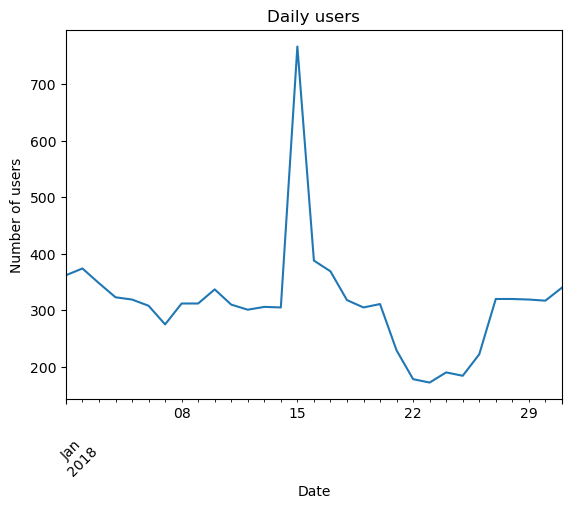

In [20]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.xlabel('Date')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Chapter 2

Calculating conversion rate

In [38]:
total = df['user_id'].nunique()

subscribers = df[df['converted']== True]['user_id'].nunique()

CR = subscribers/total

print('\nTotal:', total,'\nSubscribers:',subscribers,'\nCR:',CR)


Total: 7309 
Subscribers: 1015 
CR: 0.13886988644137366


In [78]:
daily_subscribers = df[df['converted']== True].groupby(['date_served'])['user_id'].nunique()

daily_subscribers.head()

date_served
2018-01-01    36
2018-01-02    37
2018-01-03    36
2018-01-04    35
2018-01-05    40
Name: user_id, dtype: int64

In [77]:
merged_df = pd.merge(daily_users,daily_subscribers,on='date_served')

merged_df = merge_df.rename(columns={'user_id_x':'users','user_id_y':'subscribers'})

merged_df['CR'] = merge_df['subscribers']/merge_df['users']

merged_df = merged_df.reset_index()

merged_df.head()

,date_served,users,subscribers,CR
0,2018-01-01,362,36,0.099448
1,2018-01-02,374,37,0.098930
2,2018-01-03,348,36,0.103448
3,2018-01-04,323,35,0.108359
4,2018-01-05,319,40,0.125392


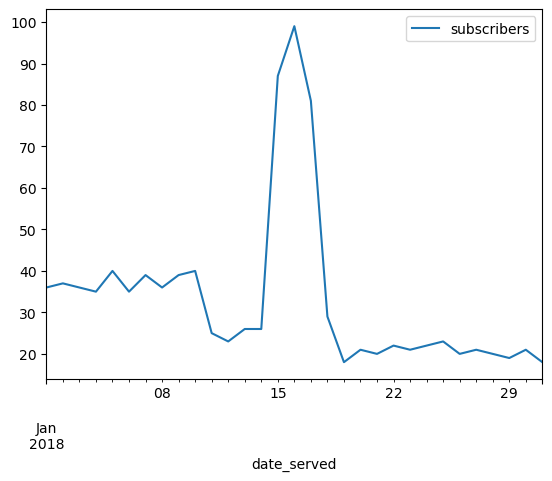

In [72]:
merged_df.plot(x='date_served',y=['subscribers'])
plt.show()

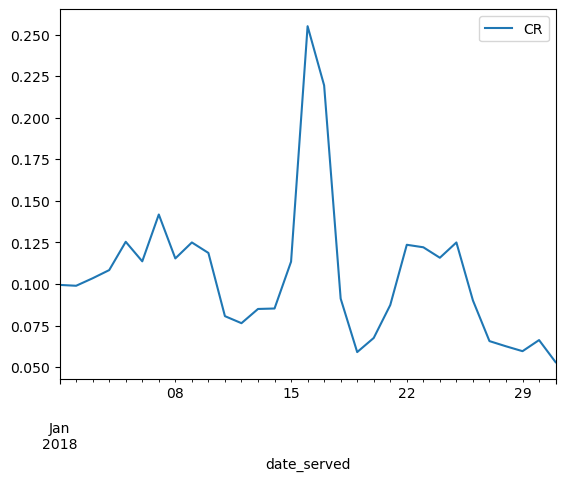

In [71]:
merged_df.plot(x='date_served',y=['CR'])
plt.show()

Calculating retention rate


In [91]:
daily_retained = df[df['is_retained']==True].groupby(['date_served'])['user_id'].nunique()

daily_retained.head()

date_served
2018-01-01    54
2018-01-02    86
2018-01-03    66
2018-01-04    34
2018-01-05    36
Name: user_id, dtype: int64

In [86]:
merged_df2 = pd.merge(merged_df,daily_retained, on='date_served')

merged_df2.rename(columns={'user_id':'retained'},inplace=True)

merged_df2['RR'] = merged_df2['retained']/merged_df2['users']

merged_df2.head()

,date_served,users,subscribers,CR,retained,RR
0,2018-01-01,362,36,0.099448,54,0.149171
1,2018-01-02,374,37,0.098930,86,0.229947
2,2018-01-03,348,36,0.103448,66,0.189655
3,2018-01-04,323,35,0.108359,34,0.105263
4,2018-01-05,319,40,0.125392,36,0.112853


English speakers

In [95]:
englishSpeakers_df = df[df['language_displayed']=='English'].groupby(['date_served'])['user_id'].nunique()

englishSpeakers_df.head()

date_served
2018-01-01    345
2018-01-02    359
2018-01-03    335
2018-01-04    305
2018-01-05    303
Name: user_id, dtype: int64

In [104]:
merged_df3 = pd.merge(merged_df2,EnglishSpeakers_df, on='date_served')

merged_df3.rename(columns={'user_id':'englishSpeakers'},inplace=True)

merged_df3['englishRate'] = merged_df3['englishSpeakers']/merged_df3['users']

merged_df3.head(10)

,date_served,users,subscribers,CR,retained,RR,englishSpeakers,englishRate
0,2018-01-01,362,36,0.099448,54,0.149171,345,0.953039
1,2018-01-02,374,37,0.098930,86,0.229947,359,0.959893
2,2018-01-03,348,36,0.103448,66,0.189655,335,0.962644
3,2018-01-04,323,35,0.108359,34,0.105263,305,0.944272
4,2018-01-05,319,40,0.125392,36,0.112853,303,0.949843
5,2018-01-06,308,35,0.113636,39,0.126623,292,0.948052
6,2018-01-07,275,39,0.141818,36,0.130909,263,0.956364
7,2018-01-08,312,36,0.115385,33,0.105769,296,0.948718
8,2018-01-09,312,39,0.125000,38,0.121795,302,0.967949
9,2018-01-10,337,40,0.118694,52,0.154303,312,0.925816
